In [4]:
# all the necessary imports
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
# FAOSTAT are are split into multiple groups, FAOSTAT_countries consists from names of the countries
# and FAOSTAT_country_groups consists from bigger areas, such as (Europe, Americas, East Europe etc.)
FAOSTAT_country_data = pd.read_csv("data/faostat/FAOSTAT_countries.csv", engine='python')
FAOSTAT_country_groups = FAOSTAT_country_data["Country Group"].unique()
FAOSTAT_countries = FAOSTAT_country_data["Country"].unique()
CONTINENTS = ['Africa', 'Asia', 'Australia and New Zealand', 'Europe', 'Northern America', 'South America']

### Inputs_LandUse_E_All_Data_cleared.csv

In [6]:
# select tree areas from Inputs_LandUse 
LAND_USE_FOREST_ITEMS = ['Forestry', 'Forest land', 'Primary Forest','Other naturally regenerated forest', 'Planted Forest']

land_use_all = pd.read_csv("data/faostat/Inputs_LandUse_E_All_Data_cleared.csv", engine='python')
land_use = land_use_all[land_use_all.Item.isin(LAND_USE_FOREST_ITEMS) &
                        land_use_all.Element.str.match('Area')]


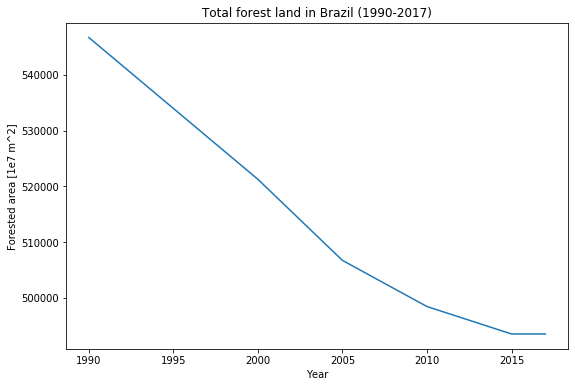

In [18]:
# total foreseted area (ha) for every contry per year
total_forested_area_yearly = land_use[land_use.Area.isin(FAOSTAT_countries) & 
                                      land_use.Item.str.match('Forestry')]

# plot forested area in COUNTRY over years
COUNTRY = 'Brazil'
country_forested_area_yearly = total_forested_area_yearly.loc[total_forested_area_yearly['Area'] == COUNTRY]

plt.figure(figsize=(9, 6))
plt.plot(country_forested_area_yearly['Year'], country_forested_area_yearly['Value'])
plt.title('Total forest land in ' + COUNTRY + ' (1990-2017)')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

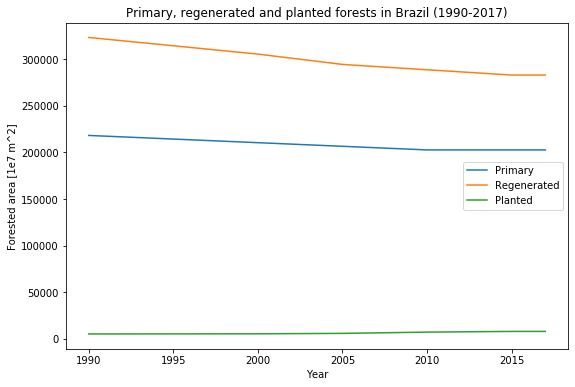

In [16]:
# plot the three kinds of forest (primary, regenerated and planted) for the selected country
COUNTRY = 'Brazil'
LAND_USE_PARTIAL_FOREST_ITEMS = ['Primary Forest', 'Other naturally regenerated forest', 'Planted Forest']

country_partial_forested_area = land_use.loc[(land_use_all['Item'].isin(LAND_USE_PARTIAL_FOREST_ITEMS)) &
                                             (land_use_all['Area'] == COUNTRY)]

plt.figure(figsize=(9, 6))
for forest_type in LAND_USE_PARTIAL_FOREST_ITEMS:
    plt.plot(country_partial_forested_area.loc[country_partial_forested_area['Item'] == forest_type]['Year'],
             country_partial_forested_area.loc[country_partial_forested_area['Item'] == forest_type]['Value'])
plt.title('Primary, regenerated and planted forests in ' + COUNTRY + ' (1990-2017)')
plt.legend(['Primary', 'Regenerated', 'Planted'])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
# plt.savefig(COUNTRY + '_primary_regenerated_planted_forests')
plt.show()

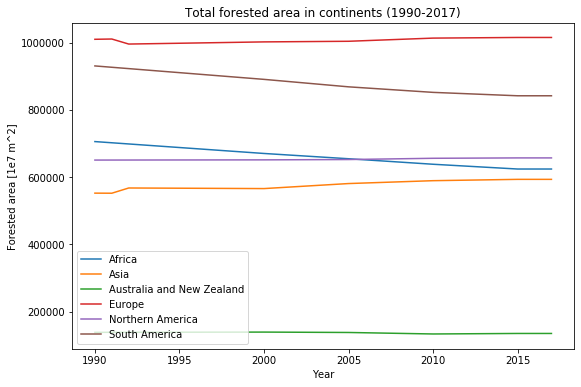

In [15]:
# forested areas in continents over yers
continents_forests_area = land_use_all[land_use_all.Item.str.match('Forestry') &   
                                       land_use_all.Element.str.match('Area') & 
                                       land_use.Area.isin(CONTINENTS)]

plt.figure(figsize=(9, 6))
for continent in sorted(continents_forests_area.Area.unique().tolist()):
    plt.plot(continents_forests_area[continents_forests_area['Area'] == continent]['Year'],
             continents_forests_area[continents_forests_area['Area'] == continent]['Value'])
plt.title('Total forested area in continents (1990-2017)')
plt.legend(sorted(continents_forests_area.Area.unique().tolist()), loc='best')
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Forested area [1e7 m^2]')
plt.show()

### Environment_LandUse_E_All_Data_cleared.csv

In [26]:
# load ENV LansUse and select share of the forests in the each Area per yesr 
ENV_LAND_USE_FOREST = ['Forest land', 'Primary Forest', 'Planted Forest', 
                       'Other naturally regenerated forest']

env_land_use_all = pd.read_csv("data/faostat/Environment_LandUse_E_All_Data_cleared.csv", engine='python')

env_land_use = env_land_use_all[env_land_use_all.Item.isin(ENV_LAND_USE_FOREST) & env_land_use_all.Element.str.match("Share in Land area")]

env_land_use_yearly = env_land_use.groupby(["Area", "Year"]).Value.sum()
env_land_use_yearly = env_land_use_yearly.unstack("Year").fillna(method="backfill", axis=0)

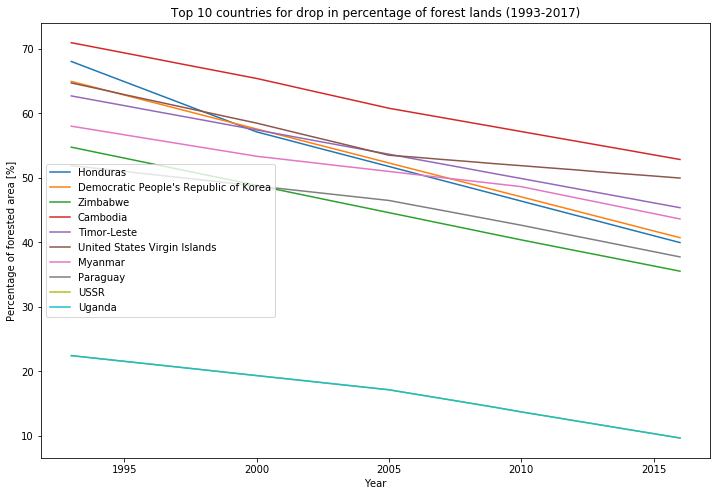

In [27]:
# start from 1993 to avoid big drops in Serbia, Slovakia, Eritrea...
# env_land_use_yearly can be replaced by Inputs_LandUse_E_All_Data_cleared dataset,
# which already contains data for forested land (even if not percentage, but can be easily computed)

# column 3 -> 1993, column -1 -> 2017
env_land_use_diff_from_1993 = env_land_use_yearly[env_land_use_yearly.index.isin(FAOSTAT_countries)].iloc[:, 3] -\
                              env_land_use_yearly[env_land_use_yearly.index.isin(FAOSTAT_countries)].iloc[:, -1]
env_land_use_diff_from_1993 = env_land_use_diff_from_1993.sort_values(ascending=False)

forested_percentage_yearly = env_land_use_yearly.drop([1990, 1991, 1992], axis=1)

plt.figure(figsize=(12,8))
for country in env_land_use_diff_from_1993.index[0:10]:
    plt.plot(forested_percentage_yearly.columns.values, 
             forested_percentage_yearly.loc[forested_percentage_yearly.index == country].values[0])

plt.legend(env_land_use_diff_from_1993.index[0:10])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Percentage of forested area [%]')
plt.title('Top 10 countries for drop in percentage of forest lands (1993-2017)')
plt.show()

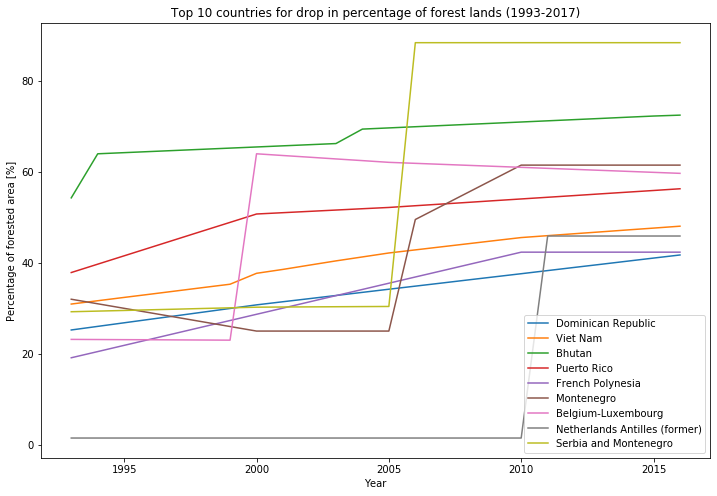

In [28]:
# top 10 countries for increasing percentage of forested areas
plt.figure(figsize=(12,8))
for country in env_land_use_diff_from_1993.index[-10:-1]:
    plt.plot(forested_percentage_yearly.columns.values, 
             forested_percentage_yearly.loc[forested_percentage_yearly.index == country].values[0])

plt.legend(env_land_use_diff_from_1993.index[-10:-1])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Percentage of forested area [%]')
plt.title('Top 10 countries for drop in percentage of forest lands (1993-2017)')
plt.show()

**Very messy data**

### Environment_LandCover_E_All_Data_cleared.csv

In [29]:
env_land_cover_all = pd.read_csv("data/faostat/Environment_LandCover_E_All_Data_cleared.csv", engine='python')

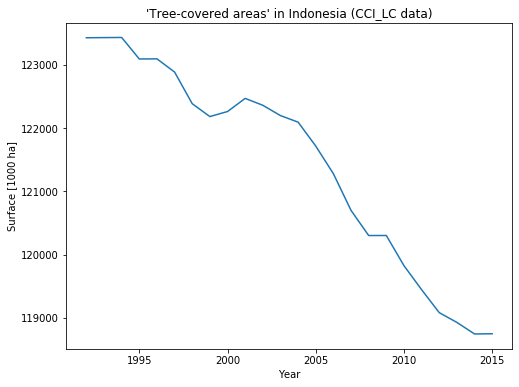

In [30]:
# 1) select COUNTRY and DATA_TYPE
# 2) choose if you want to plot all the valailable statistics (PLOT_UNIQUE = False)
#    or just one; in his case (PLOT_UNIQUE = True), select the statistic in UNIQUE_LAND_TYPE

COUNTRY = 'Indonesia'
DATA_TYPE = 'CCI_LC' # 'CCI_LC' or 'MODIS'
PLOT_UNIQUE = True
UNIQUE_LAND_TYPE = 'Tree-covered areas'

land_types = env_land_cover_all.Item.unique()
for LAND_TYPE in land_types:
    selected_item_yearly = env_land_cover_all.loc[(env_land_cover_all['Item'] == LAND_TYPE) &
                                                  (env_land_cover_all.Area.str.match(COUNTRY)) &
                                                  (env_land_cover_all.Element.str.match('Area from ' + DATA_TYPE)), 
                                                  ['Value', 'Year']]
    if PLOT_UNIQUE & (UNIQUE_LAND_TYPE != LAND_TYPE):
        continue
    if selected_item_yearly.Value.isnull().sum() == 0: # if the selected LAND_TYPE is registered every year
        plt.figure(figsize=(8, 6))
        plt.plot(selected_item_yearly['Year'], selected_item_yearly['Value'])
        plt.title("'" + LAND_TYPE + "' in " + COUNTRY + " (" + DATA_TYPE + " data)")
        plt.gca().set_xlabel('Year')
        plt.gca().set_ylabel('Surface [1000 ha]')
        plt.show()

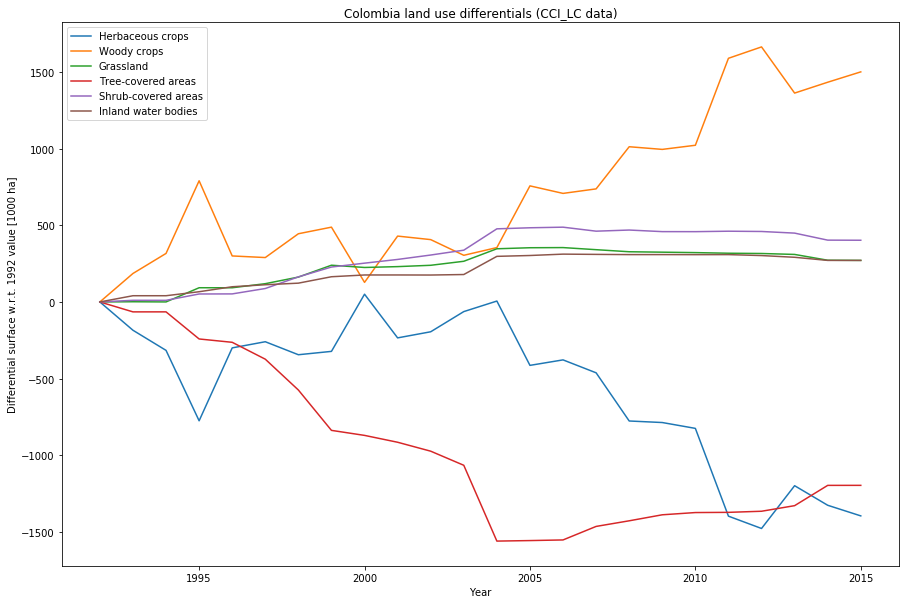

In [34]:
# 1) select COUNTRY and DATA_TYPE
# 2) choose a threshold for filtering the significant columns for the plot. 
#    The threshold depends on COUNTRY and DATA_TYPE.
#    Suggested thresholds: Switzerland,   MODIS   -> 300
#                          Switzerland,   CCI_LC  -> 300
#                          Brazil,        MODIS   -> 10000
#                          Brazil,        CCI_LC  -> 30000

COUNTRY = 'Colombia'
DATA_TYPE = 'CCI_LC' # 'CCI_LC' or 'MODIS'
THRESHOLD_SIGNIFICANT_LAND_TYPE = 1000


def is_significant(column, threshold):
    """
    Check if the current column contains high variations (w.r.t. the threshold) during the years.
    Total variation is computed as sum of yearly variation w.r.t. reference year.
    """
    cumulative_sum = column.values.sum()
    if abs(cumulative_sum) < threshold:
        return False
    else:
        return True
    

# create a DataFrame with year as only column. Years listed depend on the DATA_TYPE
country_land_types_yearly = pd.DataFrame(env_land_cover_all[env_land_cover_all.Element.str.match('Area from ' + DATA_TYPE)].Year.unique(), 
                                         columns=['Year'])

# fill the DataFrame columns: each column is a specific land type, each row is a year
land_types = env_land_cover_all.Item.unique()
for LAND_TYPE in land_types:
    selected_item_yearly = env_land_cover_all.loc[(env_land_cover_all['Item'] == LAND_TYPE) &
                                                  (env_land_cover_all.Area.str.match(COUNTRY)) &
                                                  (env_land_cover_all.Element.str.match('Area from ' + DATA_TYPE)), 
                                                  'Value']
    if selected_item_yearly.isnull().sum() == 0: # if the selected LAND_TYPE is registered every year
        country_land_types_yearly[LAND_TYPE] = selected_item_yearly.values

# compute differences w.r.t. first year of measurement for every column
starting_year = country_land_types_yearly.iloc[0, 0]
country_land_types_year_diff = country_land_types_yearly - country_land_types_yearly.iloc[0, :]
country_land_types_year_diff['Year'] = country_land_types_year_diff['Year'] + starting_year    # restore correct year after subtraction

# set 'Year' as the new index
country_land_types_year_diff.set_index('Year', inplace=True)

plt.figure(figsize=(15, 10))
selected_land_types = []

for column_index, LAND_TYPE in enumerate(country_land_types_year_diff.columns):
    
    # skip column (time series for selected LAND_TYPE) if not significant change is visible
    if is_significant(country_land_types_year_diff.loc[:, LAND_TYPE], THRESHOLD_SIGNIFICANT_LAND_TYPE):
        
        # save current column index to print column name in legend
        selected_land_types.append(column_index)
        
        plt.plot(country_land_types_year_diff.index,
                 country_land_types_year_diff[LAND_TYPE])

plt.title(COUNTRY + " land use differentials (" + DATA_TYPE + " data)")
plt.legend(country_land_types_year_diff.columns[selected_land_types])
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Differential surface w.r.t. ' + str(int(country_land_types_year_diff.index[0])) + ' value [1000 ha]')
# plt.savefig(COUNTRY + "_differentials_" + DATA_TYPE)
plt.show()

**I like this plot, seems quite effective and informative.** 

It represents changes in different land types with respect to the "ground level" in 1992 (for CCI_LC, or 2001 for MODIS). 

It's easy to identify where the lost forests are classified.

### Forestry_E_All_Data_cleared.csv, Forestry_Trade_Flows_E_All_Data_cleared.csv

In [35]:
# load Forestry data
forest_all = pd.read_csv("data/faostat/Forestry_E_All_Data_cleared.csv", engine='python')
forest_trade = pd.read_csv("data/faostat/Forestry_Trade_Flows_E_All_Data_cleared.csv", engine='python')

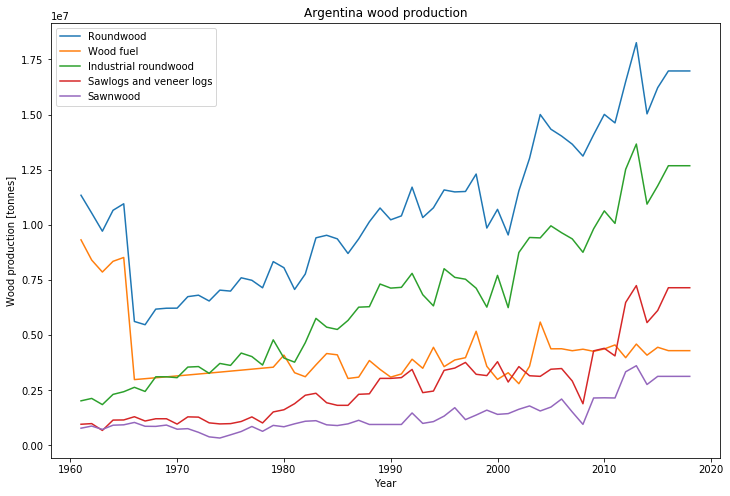

In [37]:
# Types of wood production.
# Plot only categories that:
# 1) existed since 1962
# 2) have a production value (in 2018) that is above the avarage of the values among all categories
# 3) are aggregated and do not distinguish between coniferous and non-coniferous
COUNTRY = 'Argentina'
UNIT = 'tonnes'  # 'm3' or 'tonnes'

country_total_production = forest_all[forest_all.Element.str.match("Production") & 
                                      forest_all.Area.str.match(COUNTRY) & 
                                      forest_all.Unit.str.match("m3")]

# 1) for COUNTRY, find categories ('Item') that didn't change name between 1962 and 2018 (hopefully they are the most important)
longlasting_items = []
for wood_category in country_total_production.loc[(country_total_production.Year == 1962), 'Item'].unique():
    if wood_category in country_total_production.loc[(country_total_production.Year == 2018), 'Item'].unique():
        longlasting_items.append(wood_category)

# 2) among the longlasting_items, select those which have a 'Value' above the mean in 2018 (the most important ones)
country_significant_items = country_total_production.loc[(country_total_production.Year == 2018) & 
                                                         (country_total_production.Item.isin(longlasting_items))]\
                                                    .loc[(country_total_production.Value > country_total_production.Value.mean()),
                                                         'Item']

# 3) eliminate distinction between coniferous and non-coniferous (keep only aggregated values)
filtered_country_significant_items = []
for wood_type in country_significant_items:
    if 'coniferous' not in wood_type:
        filtered_country_significant_items.append(wood_type)
country_significant_items = filtered_country_significant_items

# Plot
plt.figure(figsize=(12, 8))
for ITEM in country_significant_items:
    country_selected_item = country_total_production[country_total_production.Item == ITEM]
    plt.plot(country_selected_item.Year,
             country_selected_item.Value)
plt.title(COUNTRY + " wood production")
plt.legend(country_significant_items)
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Wood production [' + UNIT + ']')
plt.show()

**But *'Roundwood'* seems to be the sum of *'Wood fuel'* and *'Industrial roundwood'*... ==> automatic selection of categories is not so good**

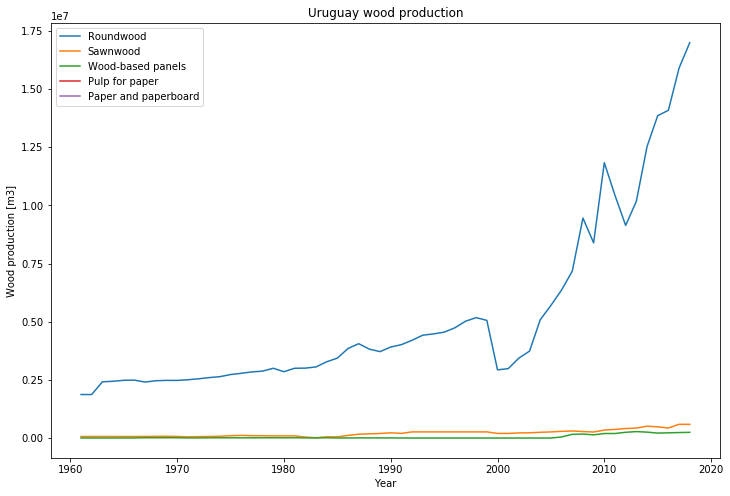

In [43]:
# Types of wood production.
# Plot only 5 main categories
COUNTRY = 'Uruguay'
UNIT = 'm3'  # 'm3' or 'tonnes'

country_total_production = forest_all[forest_all.Element.str.match("Production") & 
                                      forest_all.Area.str.match(COUNTRY) & 
                                      forest_all.Unit.str.match(UNIT)]

significant_items = ['Roundwood',
                     'Sawnwood',
                     'Wood-based panels',
                     'Pulp for paper',
                     'Paper and paperboard']

# Plot
plt.figure(figsize=(12, 8))
for ITEM in significant_items:
    country_selected_item = country_total_production[country_total_production.Item == ITEM]
    plt.plot(country_selected_item.Year,
             country_selected_item.Value)
plt.title(COUNTRY + " wood production")
plt.legend(significant_items)
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Wood production [' + UNIT + ']')
plt.show()

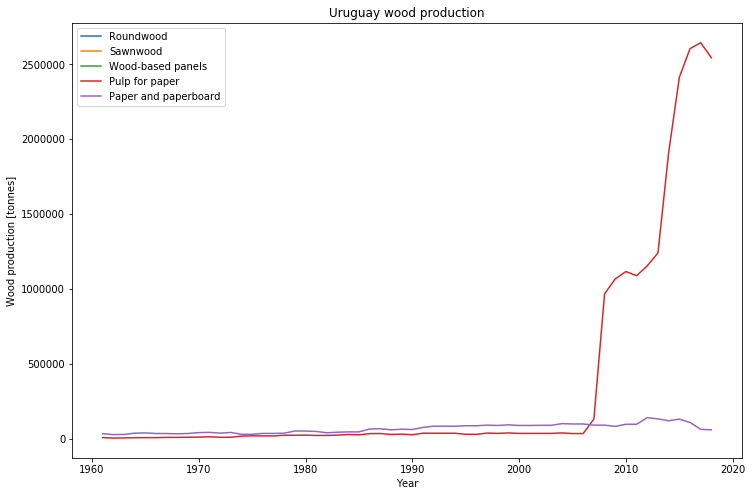

In [40]:
# Types of wood production.
# Plot only 5 main categories
COUNTRY = 'Uruguay'
UNIT = 'tonnes'  # 'm3' or 'tonnes'

country_total_production = forest_all[forest_all.Element.str.match("Production") & 
                                      forest_all.Area.str.match(COUNTRY) & 
                                      forest_all.Unit.str.match(UNIT)]

significant_items = ['Roundwood',
                     'Sawnwood',
                     'Wood-based panels',
                     'Pulp for paper',
                     'Paper and paperboard']

# Plot
plt.figure(figsize=(12, 8))
for ITEM in significant_items:
    country_selected_item = country_total_production[country_total_production.Item == ITEM]
    plt.plot(country_selected_item.Year,
             country_selected_item.Value)
plt.title(COUNTRY + " wood production")
plt.legend(significant_items)
plt.gca().set_xlabel('Year')
plt.gca().set_ylabel('Wood production [' + UNIT + ']')
plt.show()

**In the two plots above the only change is in UNIT (4th row): *'Roundwood'*, *'Wood fuel'* and *'Industrial roundwood'* are measured in m^3, *Pulp for paper* and *Paper and paperboard* in tonnes.**

**These 5 categories are suggested in dataset description on FAO website**